# Worksheet 12

Name: Stone Harris
UID: U41533031

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes, this is classification because the outcome is categorical
3. No, this is not classification because the outcome is a continuous varaibale
3. Yes, this is classification because the outcome is categorical
4. No, this is not classification because the outcome is a continuous varaibale

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

First split the dataset. Most of the data will be for testing and the minority will be for training the model. After training, use the model on the testing set. The model has not seen this data in training so it will be a good show of capability. Use metrics to evaluate performance and then iterate as much as necessary.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.


Underfitting happens when a model is too simple to pick up on the patterns of the data. This leads to poor performance on both the training and testing datasets. Signs of underfitting: unusually low accuracy on both datasets and a lack of improvement even with increased training.

Overfitting is when a model learns the training data too well, making it less generalizable to new data. This results in high accuracy on the training dataset but much lower accuracy on the testing dataset.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

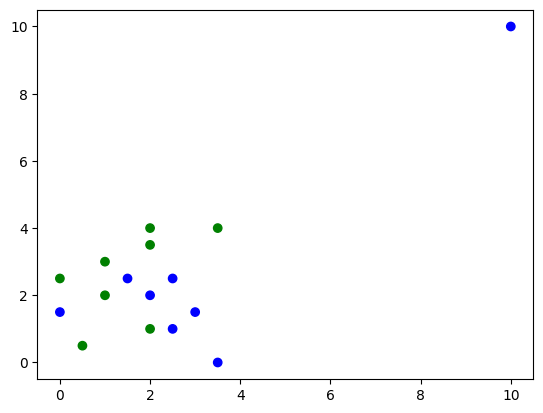

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, that last (10, 10) point is certainly an outlier.

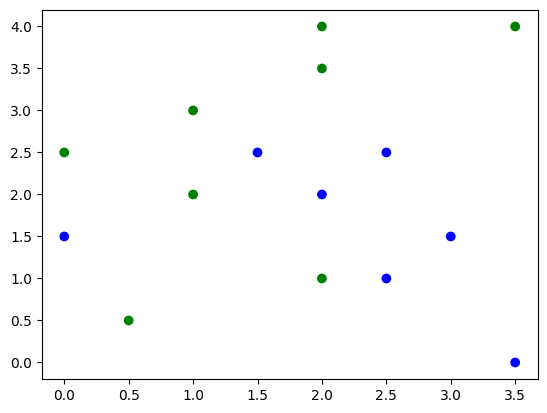

In [11]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

structured_data = np.array(list(zip(data["Attribute A"], data["Attribute B"], data["Class"])))
outlier = np.array((10, 10))

# find the indices where A and B are both != 10 then filter out rest
non_outlier_indices = ~np.all(structured_data[:, :2] == outlier, axis=1)
filtered_data = structured_data[non_outlier_indices]
data_no_outlier = {
    "Attribute A": filtered_data[:, 0].tolist(),
    "Attribute B": filtered_data[:, 1].tolist(),
    "Class": filtered_data[:, 2].astype(int).tolist()
}

colors_filtered = np.array(['green' if c == 1 else 'blue' for c in data_no_outlier["Class"]])
plt.scatter(data_no_outlier["Attribute A"], data_no_outlier["Attribute B"], color=colors_filtered)
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

It does not seem like there are any obvious noise points. Most points seem to be in clusters with other points of the same color.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

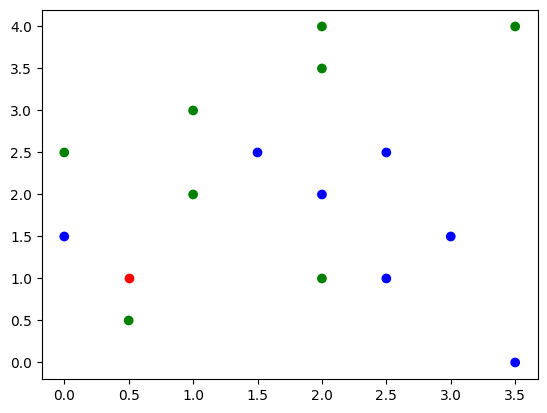

In [14]:
data_no_outlier = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
}

colors_filtered = np.array(['green' if c == 1 else 'blue' for c in data_no_outlier["Class"]])
new_point = {"Attribute A": [0.5], "Attribute B": [1]}

plt.scatter(data_no_outlier["Attribute A"], data_no_outlier["Attribute B"], color=colors_filtered)
plt.scatter(new_point["Attribute A"], new_point["Attribute B"], color='red')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

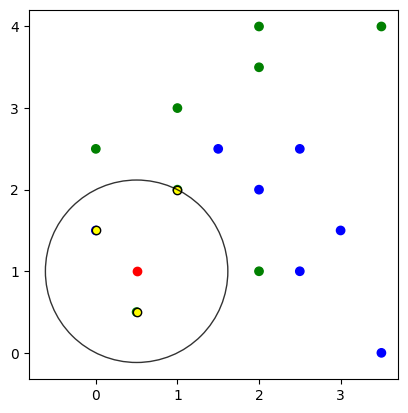

In [20]:
def n_closest_to(example, data, n):
    distances = np.sqrt(np.sum((data - example) ** 2, axis=1))
    closest_indices = np.argsort(distances)[:n]
    closest_distances = distances[closest_indices]
    radius = closest_distances[-1]
    
    return closest_indices, radius

data_points = np.array(list(zip(data_no_outlier["Attribute A"], data_no_outlier["Attribute B"])))
location = np.array([0.5, 1]) 
closest_indices, radius = n_closest_to(location, data_points, 3)

_, axes = plt.subplots()
axes.scatter(data_no_outlier["Attribute A"], data_no_outlier["Attribute B"], color=colors_filtered)
axes.scatter(location[0], location[1], color='red')


for idx in closest_indices:
    axes.scatter(data_points[idx][0], data_points[idx][1], color='yellow', edgecolor='black')


cir = plt.Circle(location, radius, fill=False, color='black', alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [23]:
def majority(points, data_classes):
    point_classes = [data_classes[i] for i in points]
    counts = np.bincount(point_classes)
    return np.argmax(counts)

closest_classes = [data_no_outlier["Class"][i] for i in closest_indices]

assigned_class = majority(closest_indices, data_no_outlier["Class"])

print("The class assigned to the new point by the majority function is:", assigned_class)


The class assigned to the new point by the majority function is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [36]:
def n_closest_to(example, data, n):
    distances = np.sqrt(np.sum((data - example) ** 2, axis=1))
    closest_indices = np.argsort(distances)[:n]
    closest_distances = distances[closest_indices]
    radius = closest_distances[-1]
    return closest_indices, radius

def majority(points, data_classes):
    point_classes = [data_classes[i] for i in points]
    counts = np.bincount(point_classes)
    return np.argmax(counts)

count = 0
data_points = np.array(list(zip(data_no_outlier["Attribute A"], data_no_outlier["Attribute B"])))
data_classes = np.array(data_no_outlier["Class"])

for i in range(len(data_points)):
    test_example = data_points[i]

    training_indices = list(range(len(data_points)))
    training_indices.remove(i)
    training_set = data_points[training_indices]

    closest_indices, _ = n_closest_to(test_example, training_set, 3)
    prediction = majority(closest_indices, data_classes[training_indices])
    
    if prediction == data_classes[i]:
        count += 1

overall_accuracy = count / len(data_points)
print("overall accuracy =", overall_accuracy)

overall accuracy = 0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((56000, 784), (14000, 784), (56000,), (14000,))

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

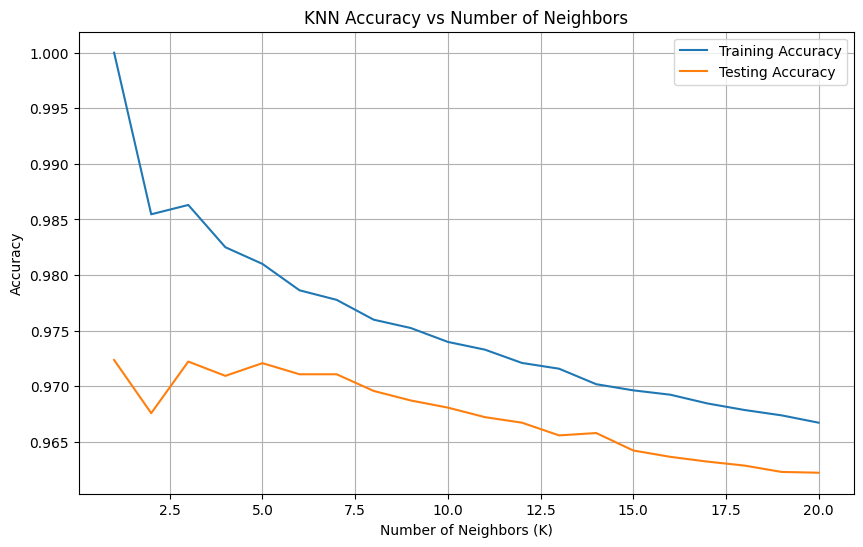

Optimal K: 1 with testing accuracy: 0.9723571428571428


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

train_accuracies = []
test_accuracies = []

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

optimal_k = k_values[test_accuracies.index(max(test_accuracies))]
print(f"Optimal K: {optimal_k} with testing accuracy: {max(test_accuracies)}")


c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

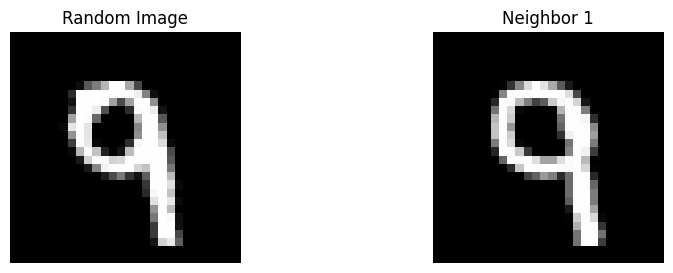

In [44]:
import random

def n_closest_to(example, data, n):
    distances = np.sqrt(np.sum((data - example) ** 2, axis=1))
    closest_indices = np.argsort(distances)[:n]
    return closest_indices

best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train, y_train)

random_index = random.randint(0, len(X_test) - 1)
random_image = X_test[random_index]

neighbors_indices = n_closest_to(random_image.reshape(1, -1), X_train, optimal_k)

neighbors_images = X_train[neighbors_indices]

fig, axes = plt.subplots(1, optimal_k + 1, figsize=(10, 3))

axes[0].imshow(random_image.reshape(28, 28), cmap='gray')
axes[0].set_title("Random Image")
axes[0].axis('off')

for i, img in enumerate(neighbors_images):
    axes[i+1].imshow(img.reshape(28, 28), cmap='gray')
    axes[i+1].set_title(f"Neighbor {i+1}")
    axes[i+1].axis('off')

plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

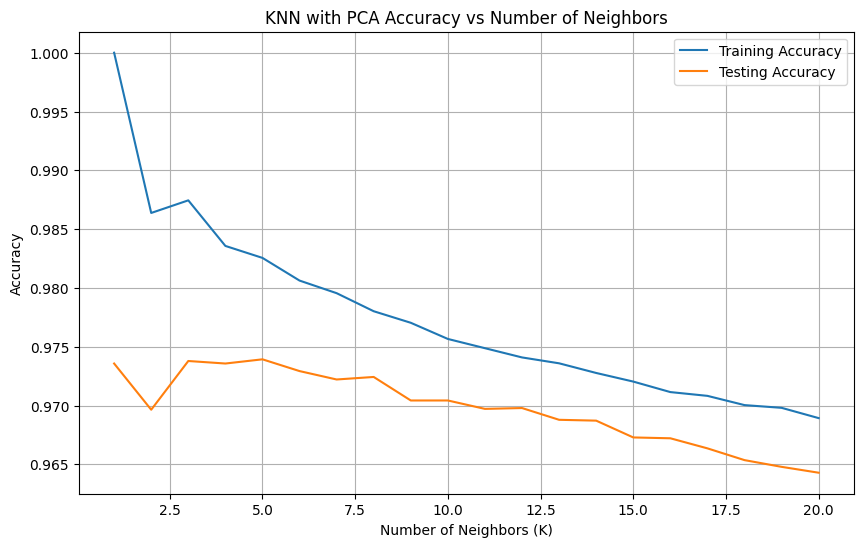

Optimal K after PCA: 5 with testing accuracy: 0.9739285714285715


In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pca = PCA(n_components=0.95)
train_accuracies = []
test_accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    model = make_pipeline(pca, knn_model)
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN with PCA Accuracy vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

optimal_k_pca = k_values[test_accuracies.index(max(test_accuracies))]
optimal_test_accuracy_pca = max(test_accuracies)

print(f"Optimal K after PCA: {optimal_k_pca} with testing accuracy: {optimal_test_accuracy_pca}")

The trends from the graphs that I generated seem to suggest that PCA has  led to a model that generalizes better, which you can see with the smoother decline in testing accuracy as K increases.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below